# Lekce 6

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
)
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings("ignore")

### Popis importů

* `ConfusionMatrixDisplay` - vizualizace matice záměn, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
* `accuracy_score`, `precision_score` a `recall_score` - funkce pro vyhodnocení výsledků modelu, dokumentace je [zde](https://scikit-learn.org/stable/modules/classes.html#classification-metrics)
* `OneHotEncoder` provádí One Hot Encoding zadaných dat, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* `LabelEncoder` provádí Label Encoding zadaných dat, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
* `train_test_split` - funkce pro rozdělení dat na trénovací a testovací, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* `GridSearchCV` hledá nejlepší parametry klasifikátoru ze zadaného rozsahu podle zadané metriky, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* `LinearSVC` je klasifikátor používající lineární verzi algoritmu Support Vector Machine a One-to-Rest postup pro klasifikaci do více tříd, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
* `SVC` je klasifikátor, který umožňuje využívat lineární i nelineární verzi algoritmu Support Vector machine a přístupy One-to-Rest i One-to-One, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* `StandardScaler` - objekt pro normalizaci dat, dokumentace je [zde](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

## Support Vector Machine

V této lekci budeme používat jeden z legendárních datasetů ve světě Data Science - [dataset o kostatcích z roku 1936](https://en.wikipedia.org/wiki/Iris_flower_data_set). Datovou sadu s daty o kosetcích (Iris) představil britský statistik a biolog Ronald Fisher ve svém článku z roku 1936 o využití mnohonásobných měření v taxonomických problémech. Někdy se mu říká Andersonův kosatcový datový soubor, protože Edgar Anderson shromáždil data k měření morfologické variace květin kosatce tří souvisejících druhů. Datová sada obsahuje 50 vzorků od každého ze tří druhů kosatce (Iris Setosa, Iris virginica a Iris versicolor). Od každého vzorku byly změřeny čtyři vlastnosti: délka a šířka kališních lístků a korunních lístků, v centimetrech.

Data jsou ke stažení [zde](IRIS.csv)

![iris-machinelearning.png](iris-machinelearning.png)

In [44]:
data = pd.read_csv("IRIS.csv")
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Naším úkolem bude prozkoumat, jestli je možné čistě na základě rozměrů uhádnout, o který druh kosatce se jedná. Abychom se drželi binární klasifikace, necháme se vi datech pouze dva druhý - Iris Versicolor a Iris Setosa. Abychom si data mohli zobrazit pomocí obrázku, využijeme navíc pouze dva číselné údaje - výšku a šířku kališního lístku.

In [45]:
data = data[data["species"].isin(['Iris-setosa', 'Iris-versicolor'])]
data = data[["sepal_length", "sepal_width", "species"]]
data.head()

,sepal_length,sepal_width,species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


Data si zobrazíme jako bodový graf. Když se podíváme na graf níže, bylo by teoreticky možné oba druhy kostatců oddělit. Navíc by toto mělo být možné s využitím lineární funkce (přímky). Právě v tom spočívá princip metody Support Vector Machine (SVM) - rozdělí prostor na dvě části s využitím lineární funkce. Metoda nakreslí hranici tak, aby vzdálenost od nejbližších bodů z k hranici byla z obou stran co největší.

Jestliže je možné data kompletně oddělit, označujeme je jako lineárně oddělitelná (*linearly separable*).

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

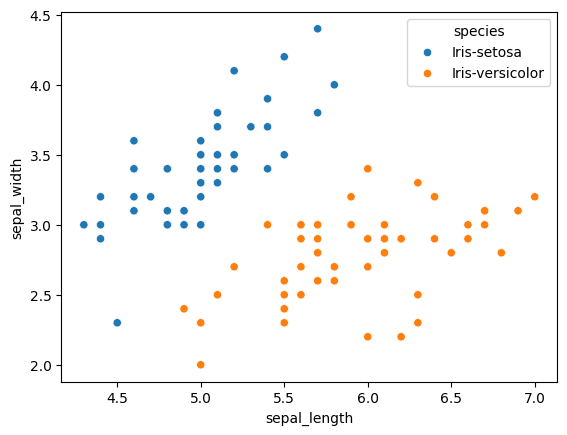

In [46]:
sns.scatterplot(data, x="sepal_length", y="sepal_width", hue="species")

Opět použijeme modul `scikit-learn`. V tomto případě jako klasifikátor využijeme `LinearSVC()`. Pouze s tím rozdílem, že jako klasifikátor využijeme `LinearSVC`.

In [47]:
X = data.drop(columns=["species"])
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

S využitím `DecisionBoundaryDisplay` můžeme do našeho grafu vložit hranici, která obě skupiny rozděluje. V tom spočívá princip metody Support Vector Machine (SVM, metoda podpůrných vektorů, SVC je zkratka Support Vector Classifier). SVM je další z algoritmů strojového učení, který můžeme použít pro klasifikaci a který je založený na vzdálenosti v nějakém prostoru. Algoritmus je založený na rozdělení možných hodnot vstupních proměnných do různých nadrovin (hyperplane). Nadroviny máme dvě - pozitivní nadrovinu a negativní nadrovinu. Následně klasifikujeme data podle toho, jestli se budou nacházet v pozitivní či negativní nadrovině. 

Algoritmus nakreslí hranici mezi nadrovinami tak, aby hranice mezi nimi byla co nejširší, snaží se tedy maximalizovat vzdálenost mezi nejbližšími dvěma body. Hranice mezi skupinami dat označujeme jako *margin*. SVM se tedy snaží nají optimální nadrovinu (*optimal hyperplane*), která zajišťuje nejširší margin. Přímky, které jsou rovnoběžné s hranici a procházejí nejbližšími body k hranici jsou označeny jako *support vector*.

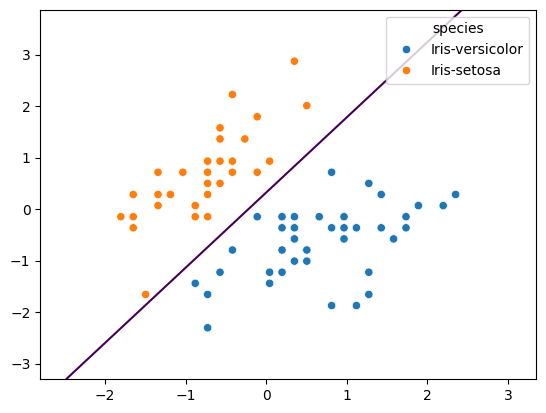

In [48]:
ax = sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
DecisionBoundaryDisplay.from_estimator(clf, X_train, ax=ax, plot_method="contour", levels=[0])

![svm_popis.png](svm_popis.png)

Opět si můžeme vytvořit matici záměn.

Vidíme, že oproti KNN (s výchozí hodnotou 5 uvažovaných sousedů) máme více True Negatives, ale za cenu méně True Positives.

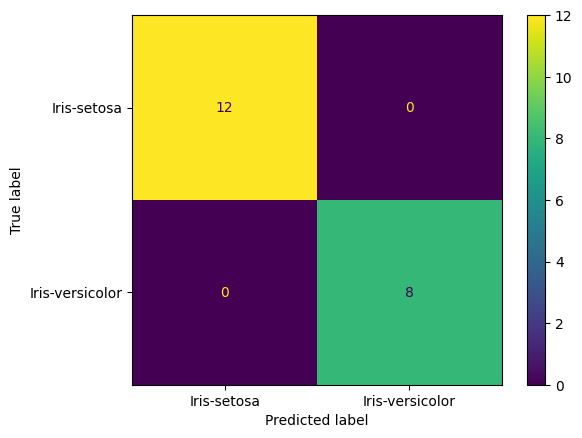

In [49]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

Můžeme si spočítat i metriky `accuracy_score`, které jsme si ukazovali v minulé lekci. Vidíme, že hodnoty metrik jsou srovnatelné s hodnotami metrik KNN.

In [50]:
accuracy_score(y_test, y_pred)

1.0

Jestliže jsou data lineárně oddělitelná, označujeme hranici mezi nimi jako *hard margin*. Pokud data není možné lineárně oddělit, hranice mezi nimi se označuje jako *soft margin*. V takovém případě se algoritmus snaží nakreslit hranici tak, aby co nejvíce bodů bylo ve "správné" nadrovině a aby body ve "špatné" nadrovině byly co nejblíže hranici. Funkce, která toto měří, se označuje jako *hinge loss*. Při kreslení soft margin jsou vyvažována dvě kritéria - šířka marginu a množství nesprávně klasifikovaných bodů. Funkce jsou vyvačovány pomocí deep parameter `C`.

## Klasifikace do více než dvou tříd

V řadě případů potřebujeme rozdělovat data do více než dvou tříd. Například pacienty můžeme rozdělovat dle stádia jejich nemoci (tj. nerozlišujeme jen zdravé a nemocné pacienty, ale pacienty zdravé, v počátečním a pokročilém stádiu nemoci), v dopravě můžeme klasifikovat několik typů vozidel (např. osobní automobil, nákladní automobil, autobus, traktor, motocykl atd.), zákaznické recence můžeme rozlišovat na pozitivní, neutrální a negativní atd.

Klasifikaci do více tříd můžeme provádět více způsoby. Jedním z nich je "přímé" řešení, tj. pracujeme od začátku do konce s klasifikací do více tříd. Takový přístup využívá například algoritmus K Nearest Neighbors (KNN) nebo rozhodovací strom.

Druhým z přístupů je převed úlohy s více třídami na problém dvou tříd, tedy binární klasifikaci. Takto postupuje algoritmus SVM. Tento postup je dále možné provádět dvěma různými způsoby:

- Prvním z nich je varianta "jeden proti všem" (**One-to-Rest**). Při jeho použití algoritmus vytvoří tolik klasifikátorů, kolik máme tříd, a trénuje každý jako **binární klasifikaci jedné třidy oproti všem ostatním**. Při predikci každý z klasifikátorů předpoví buď "svojí" třídu, nebo "ostatní třídy". Pokud bychom například rozdělovali data do tří skupin, vytvoří tento postup tři klasifikátory.
- Druhou z možností je "jeden proti jednomu" (**One-to-One**). Při jeho použití algoritmus vytvoří klasifikátor pro každou dvojici tříd. Každý klasifikátor porovnává dvě třídy a data z ostatních tříd jsou ignorována.

Data najdete [zde](Dry_Bean_Dataset.csv)

Zdroj dat: https://data.world/makeovermonday/2021w14

In [51]:
data = pd.read_csv("Dry_Bean_Dataset.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,70522,1054.957,368.156404,244.520009,1.505629,0.747578,71668,299.652130,0.729883,0.984010,0.796278,0.813926,0.005220,0.001413,0.662476,0.997443,BARBUNYA
1,70692,1006.430,378.574466,238.177906,1.589461,0.777289,71443,300.013083,0.787865,0.989488,0.877027,0.792481,0.005355,0.001303,0.628026,0.998223,BARBUNYA
2,67533,997.712,358.146303,241.279504,1.484363,0.739014,68874,293.233160,0.747377,0.980530,0.852541,0.818752,0.005303,0.001470,0.670356,0.995051,BARBUNYA
3,105542,1265.623,466.135980,288.999342,1.612931,0.784610,107112,366.579116,0.747888,0.985342,0.827993,0.786421,0.004417,0.001042,0.618458,0.997530,BARBUNYA
4,67454,1014.674,343.989033,249.988996,1.376017,0.686918,68666,293.061598,0.731677,0.982349,0.823312,0.851950,0.005100,0.001657,0.725820,0.998740,BARBUNYA


In [52]:
X = data.drop(columns=["Class"])
y = data["Class"]
y.value_counts()

Class
BARBUNYA    100
CALI        100
HOROZ       100
Name: count, dtype: int64

Rozdělíme data na trénovací a testovací sadu.

Parametr `stratify` určuje, podle jakého sloupce chceme zachovat poměr hodnot. V našem případě chceme zachovat poměr tříd (aby v trénovacích i testovacích datech byly třídy podobně zastoupené).

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [54]:
clf = SVC(kernel="linear", decision_function_shape="ovr", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Jak vyhodnocujeme klasifikaci do více tříd? 
Podíváme se, jak vypadá chybová matice pro více tříd. Funguje na stejném principu, jen je větší, a není na první pohled jasné, jak spočítat metriky jako precision nebo recall. Všimněme si ale, že základní metriky accuracy je stejná: Součet hodnot na diagonále (součet správně určených bodů) oproti velikosti datasetu.

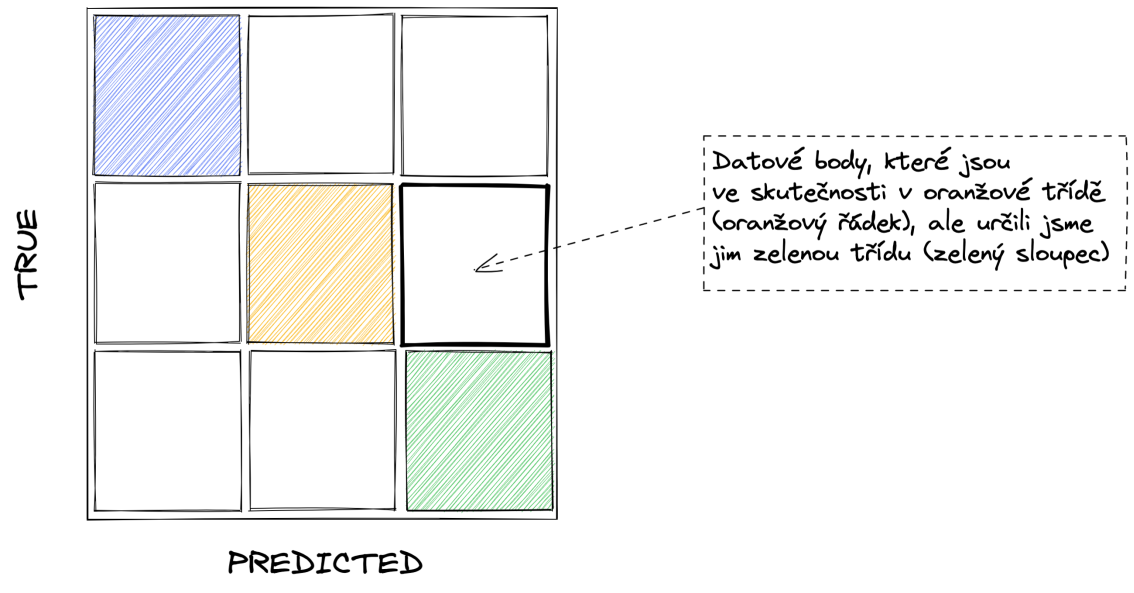

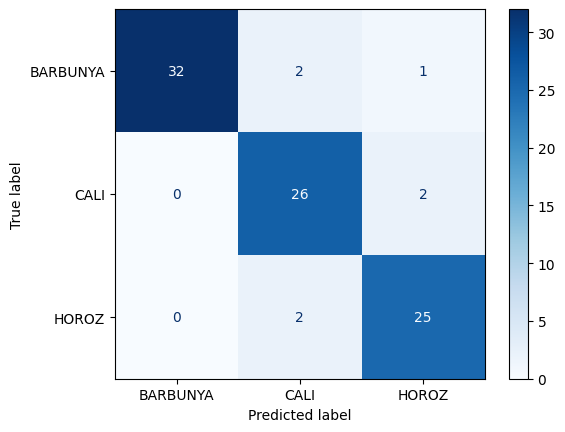

In [55]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
)

Nyní můžeme vyhodnotit přesnost. Využijeme metriku `accuracy_score`, která poměřuje počet správně označených testovacích dat oproti celkovému množství testovacích dat.

In [56]:
print(accuracy_score(y_test, y_pred))

0.9222222222222223


## Křížová validace a Grid Search

Ukazázali jsme si, že na trénování modelu může mít vliv hodnota jeho některého parametru. Například u algoritmu K Nearest Neighbors jsme zkoušeli nastavit různé hodnoty parametru `n_neighbors` pomocí for cyklu. Když bychom parametrů měli víc, můžeme použít vnořený for cyklus, ale brzy by se nám výsledky špatně porovnávaly. V knihovně `scikit-learn` existuje třída `GridSearchCV`, která nejlepší nastavení parametrů zjistí za nás.

`GridSearchCV` provádí tvz. křížovou validaci (*cross validation*). To znamená, že nerozděluje data na trénovací a testovací pouze jednou, ale vícekrát (ve výchozím nastavení celkem pětkrát). Tím se snaží předejít problému s *overfitting*, o kterém si povíme v dalších lekcích.

`GridSearchCV` tedy postupuje takto:

- pro každý ze zadaných hodnot parametrů provede několik rozdělení na trénovací a testovací data (*split*),
- pro každé rozdělení dat provede trénování modelu a zjistí hodnotu požadované metriky,
- vypočítá průměr zjištěné metriky pro všechna rozdělení dat.

Na základě průměrů metrik pro jednotlivá rozdělení pak vybere nejlepší metriku. Model tedy již není závislý na tom, jak rozdělíme data na testovací a trénovací část.

Výhoda tohoto přístupu je, že nevyžaduje tolik dat ("recykluje" totiž data, která máme k dispozici). Nevýhodou může být časová náročnost, a to zvlášť v případě, že prohledáváme hodně různých parametrů. Další výhodou je, že pomáhá zabránit jevu označovanému jako **overfitting**. Overfitting je situace, kdy je nějaký model dává velice přesné výsledky pro určité trénovací a testovací data, ale špatné výsledky pro nová data. Takový model je příliš zaměřený na specifika testovacích a trénovacích dat a špatně si pak poradí s novými daty.

Alternativou ke `GridSearchCV` je `RandomizedSearchCV`, který nevyhodnocuje všechny kombinace parametrů, ale jen náhodně vygenerovanou podskupinu. Tím pádem je rychlejší, protože nemusí provádět tolik výpočetních operací. Na druhou stranu to ale znamená, že nemusí najít tak dobrou kombinaci parametrů jako`GridSearchCV`.

!["81Yoo.png"](81Yoo.png)

Nakonec porovnáme výsledky algoritmu K Nearest Neighbors se Support Vector Machine. Tentokrát využijeme jako klasifikátor `SVC`. Zůstaneme u lineární verze, to zajistíme nastavením `kernel="linear"`. Klasifikátor `SVC` nám ale umožní vyzkoušet strategii jeden proti všem i jeden proti jednomu. Pomocí `GridSearchCV` se podíváme, která strategie vede k lepšímu výsledku.

In [57]:
model_1 = SVC(kernel="linear")
params_1 = {"decision_function_shape": ["ovo", "ovr"]}

scaler = StandardScaler()
X_fit = scaler.fit_transform(X)

clf_1 = GridSearchCV(model_1, params_1, scoring="accuracy")
clf_1.fit(X_fit, y)

print(clf_1.best_params_)
print(round(clf_1.best_score_, 2))

{'decision_function_shape': 'ovo'}
0.95


In [58]:
model_2 = KNeighborsClassifier()
params_2 = {"n_neighbors": range(1, 31, 2)}

clf_2 = GridSearchCV(model_2, params_2, scoring="accuracy")
clf_2.fit(X_fit, y)

print(clf_2.best_params_)
print(round(clf_2.best_score_, 2))

{'n_neighbors': 23}
0.95


## Čtení na doma: Nelineární SVM

Na obrázku je případ, kdy jsou obě skupiny **lineárně oddělitelné**. To ale nemusí platit vždy. V některých případech se mohou obě skupiny prolínat a není pak možné vytvořit dvě nadroviny. V takovém případě máme více možností. 

Jednou z nich je nakreslení nadrovin tak, abychom minimalizovali celkový součet špatně umístěných bodů od hranice. Jinými slovy, snažíme se, aby bodů, které jsou na špatné straně, bylo co nejméně a aby jejich vzdálenost od hranice byla co nejmenší. Takovou hranici pak označujeme jako *soft margin*.

Další z možností je použití nelineárního klasifikátoru. To spočívá v převedení dat do vyšších rozměrů. Máme-li například dvourozměrná data, můžeme data přenést do trojrozměrného prostoru. Ve trojrozměrném prostoru už pak může být možné vytvoření nadrovin tak, aby byly všechny vstupní hodnoty oddělené. Níže je příklad převedení dat z dvourozměrného prostoru do trojrozměrného. Třetí dimenze (výška) je daná vzdáleností od středu. Čím je bod v dvourozměrném prostoru blíže ke středu, tím výše ho umístíme ve dvourozměrném prostoru. Ve trojrozměrném prostoru již můžeme data rozdělit na dvě nadroviny.

![1_vjYjGdVTetHvm7s9XcidBQ.webp](1_vjYjGdVTetHvm7s9XcidBQ.webp)

My se budeme držet lineárního klasifikátoru, tj. takového, který nezvyšuje počet dimenzí našich dat. Využijeme ho pro rozdělení vín na dobrá a špatná a porovnáme si výkon SVC s algoritmem K Neares Neighbors.

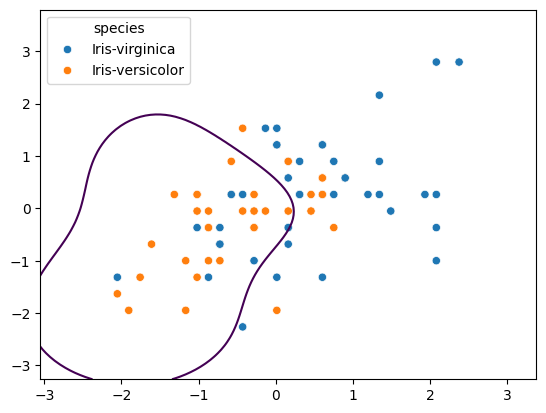

In [59]:
data = pd.read_csv("IRIS.csv")
data = data[data["species"].isin(['Iris-virginica', 'Iris-versicolor'])]
data = data[["sepal_length", "sepal_width", "species"]]

X = data.drop(columns=["species"])
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ax = sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
DecisionBoundaryDisplay.from_estimator(clf, X_train, ax=ax, plot_method="contour", levels=[0])

## Zdroje

* [Machine Learning Algorithms(16) — Support Vector Machine(SVM)](https://towardsdev.com/machine-learning-algorithms-16-support-vector-machine-svm-878c2e1d024f)
* [Support Vector Machine Algorithm](https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm)
* [Multiclass Classification Using Support Vector Machines](https://www.baeldung.com/cs/svm-multiclass-classification)
* [Support Vector Machines (SVM) and the Multi-Dimensional Wizardry](https://towardsdatascience.com/support-vector-machine-svm-and-the-multi-dimensional-wizardry-b1563ccbc127)
* [Support Vector Machine(SVM): A Complete guide for beginners](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)
* [Support Vector Machine — Introduction to Machine Learning Algorithms](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
* [What is underfitting and overfitting in machine learning and how to deal with it.](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76)

# Cvičení

## Kosatce

Vrať se k práci s data o kosatcích v souboru [IRIS.csv](IRIS.csv). Tentokrát zkus, jak dobře dokážou algoritmy pracovat se všemi třemi druhy kosatců. Využij algoritmy `KNeighborsClassifier` a `SVC` ke klasifikaci každého vzorku do jednoho ze tří druhů kosance.

Postup je stejný jako v lekci:

- Rozděl data na vstupní a výstupní proměnné. 
- Využij `GridSearchCV` k nalezení nejlepšího parametru pro `KNeighborsClassifier` (počet sousedů) a `SVC` (strategie)
- Dále vyzkoušej, jestli by nebylo zajímavé převést data do více dimenzí. Porovnej výsledek lineárního kernelu (`kernel="linear"`) s kernelem (`kernel="rbf"`). Můžeš vyzkoušet obě strategie, tj. budeš mít ve slovníku `params` dva klíče a každý z klíčů bude mít seznam dvou možných hodnot. Jaká dvojice parametrů má nejlepší hodnotu metriky `accuracy`?

Video s řešením je [zde](https://www.youtube.com/watch?v=H9VQIXm_nkY).

In [60]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Bonus: Poruchy

Stáhni si data o poruchách ze souboru [predictive_maintenance.csv](predictive_maintenance.csv). Význam sloupců je následující:

- UID: jedinečný identifikátor v rozsahu 1 až 10000,
- ID produktu: skládá se z písmene L, M nebo H pro nízkou (50 % všech výrobků), střední (30 %) a vysokou (20 %) variantu kvality výrobku a sériového čísla specifického pro danou variantu,
- teplota vzduchu (K),
- teplota procesu (K),
- otáčky (ot/min),
- točivý moment (Nm),
- opotřebení nástroje (min),
- označení "selhání stroje" (pokud k němu došlo).

Tvým úkolem je vytvořit model, který bude predikovat poruchu stroje.

Proveď následující postup:

- Vyřaď z datasetu sloupce (jsou dva), které nemají pro analýzu význam.
- Podívej se, kolik typů poruch bylo objeveno.
- Rozděl data na vstupní proměnné a výstupní proměnnou.
- Vyzkoušej algoritmy Support Vector Machine a K Nearest Neighbors ke klasifikaci poruchy stroje. Porovnej, který algoritmus dosáhl lepších výsledků. Pozor na to, že dat je nyní opravdu hodně, takže program může běžet trochu déle. Můžeš ho zrychlit tím, že pro K Nearest Neighbors budeš uvažovat pouze čtveřici možných počtů sousedů (např. 3, 5, 11, 15).

Řešení příkladu je [zde](reseni.ipynb).

In [61]:
data = pd.read_csv("predictive_maintenance.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [62]:
data.groupby("Failure Type").size()

Failure Type
Heat Dissipation Failure     112
No Failure                  9652
Overstrain Failure            78
Power Failure                 95
Random Failures               18
Tool Wear Failure             45
dtype: int64

In [63]:
X = data.drop(columns=["Failure Type"])
y = data["Failure Type"]
X_type = pd.get_dummies(X["Type"])
X = pd.merge(X, X_type, left_index=True, right_index=True)
X = X.drop(columns=["Type", "UDI", "Product ID"])
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,H,L,M
0,298.1,308.6,1551,42.8,0,0,False,False,True
1,298.2,308.7,1408,46.3,3,0,False,True,False
2,298.1,308.5,1498,49.4,5,0,False,True,False
3,298.2,308.6,1433,39.5,7,0,False,True,False
4,298.2,308.7,1408,40.0,9,0,False,True,False
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,False,False,True
9996,298.9,308.4,1632,31.8,17,0,True,False,False
9997,299.0,308.6,1645,33.4,22,0,False,False,True
9998,299.0,308.7,1408,48.5,25,0,True,False,False
